In [37]:
import pandas as pd
water = pd.read_csv("C:/Users/김혜윤/Desktop/2023-02/다변량/기말보고서/water_potability.csv")
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [38]:
water.dropna(inplace=True)
len(water)

2011

In [9]:
water.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.067201,196.008440,21628.535122,7.107267,333.742928,427.554342,14.400250,66.278712,3.955181
1,7.113791,195.908341,22344.922883,7.174395,332.457832,425.005423,14.294764,66.581596,3.991254


In [6]:
water.groupby('Potability').std()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,1.659106,30.717642,8461.108693,1.476577,36.398403,79.882677,3.370196,15.931953,0.782984
1,1.437623,35.301146,8891.547966,1.732796,47.446190,81.950982,3.257917,16.297713,0.776408


In [11]:
water[['Potability']].value_counts()

Potability
0             1200
1              811
Name: count, dtype: int64

In [13]:
1200 / 2011

0.5967180507210343

In [36]:
water.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 157.1 KB


In [10]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [39]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = water[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
x = StandardScaler().fit_transform(pd.DataFrame(x)) # x객체에 x를 표준화한 데이터를 저장
x = pd.DataFrame(x)

In [40]:
water = water.reset_index(drop=True)
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [44]:
water[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']] = x
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761,0
1,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033,0
2,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366,0
3,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163,0
4,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348,0
...,...,...,...,...,...,...,...,...,...,...
2006,1.210411,0.584770,-0.693978,-0.528284,-0.492625,-0.447578,-1.341281,-0.705001,0.825626,1
2007,-0.243774,0.347964,-0.540564,0.362137,-0.697038,-1.205321,0.559422,-2.334474,-0.675183,1
2008,2.800492,-3.100365,1.767503,1.343596,-1.803476,0.165656,0.546021,-1.545585,0.512125,1
2009,-0.646160,-0.285317,0.488576,0.387023,0.302843,-0.131852,-0.688929,-0.372108,-0.384562,1


In [46]:
x.columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [48]:
from sklearn.decomposition import PCA
pca = PCA() # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
columns = x.columns
principalDf = pd.DataFrame(data=printcipalComponents, columns = columns)

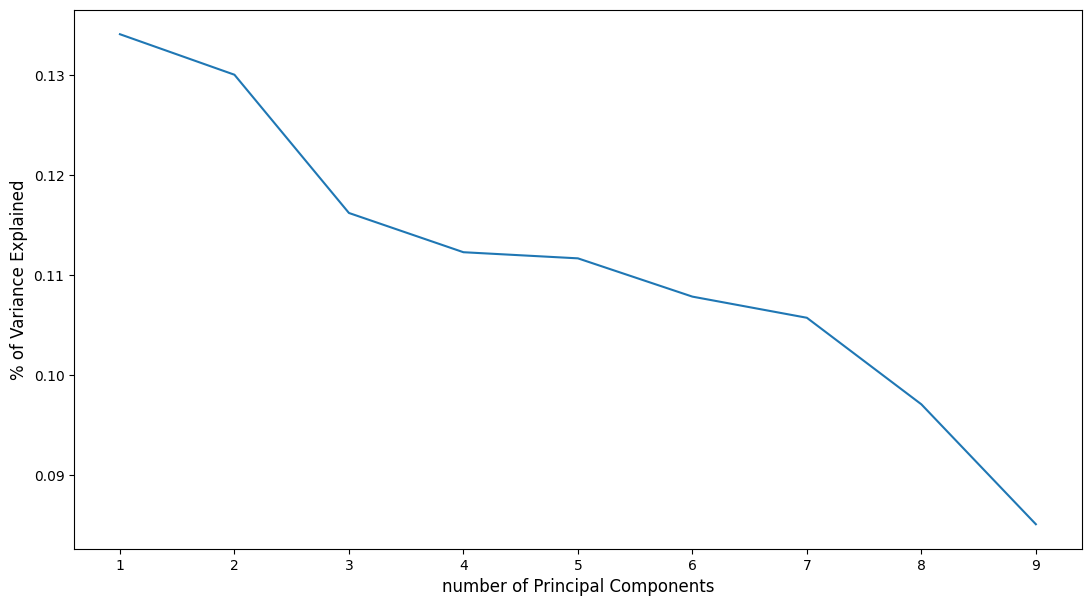

In [49]:
import matplotlib.pyplot as plt
## Principal 1 & 2 explain about 97.8% of variance
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, principalDf.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.show()

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
columns = ['주성분 1', '주성분 2', '주성분 3', '주성분 4']
principalDf = pd.DataFrame(data=printcipalComponents, columns = columns)

In [58]:
pca.explained_variance_ratio_.sum()

0.4926585932000984